In [16]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
from skimage.filters import sobel, prewitt, scharr
from skimage.feature import canny
from skimage.feature import corner_harris
from skimage.feature import corner_peaks
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu


### Importing Image

In [17]:
image1 = imread("/content/Abyssinian_181.jpg")
image2 = imread("/content/Abyssinian_19.jpg")


### Segmentation using Filters

In [18]:

def applyfilters(image):
  #Turn image to grayscale.
  gray_image = skimage.color.rgb2gray(image)
  #Apply Sobel filter to the image
  sobel_edge  = sobel(gray_image)
  #Apply Prewitt filter to the image
  prewitt_edge = prewitt(gray_image)
  #Apply Scharr filter to the image
  scharr_edge = scharr(gray_image)
  fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,8), sharex=True, sharey=True)
  ax = ax.ravel()
  fig.tight_layout()
  #Plot the original image
  ax[0].imshow(gray_image, cmap=plt.cm.gray)
  ax[0].set_title('Original Grayscale Image')
  #Plot the Sobel filter applied image
  ax[1].imshow(sobel_edge, cmap=plt.cm.gray)
  ax[1].set_title('Sobel Filter Applied Image')
  #Plot the Prewitt filter applied image
  ax[2].imshow(prewitt_edge, cmap=plt.cm.gray)
  ax[2].set_title('Prewitt Filter Applied Image')
  #Plot the Scharr filter applied image
  ax[3].imshow(scharr_edge, cmap=plt.cm.gray)
  ax[3].set_title('Scharr Filter Applied Image')
  for a in ax:
    a.axis('off')

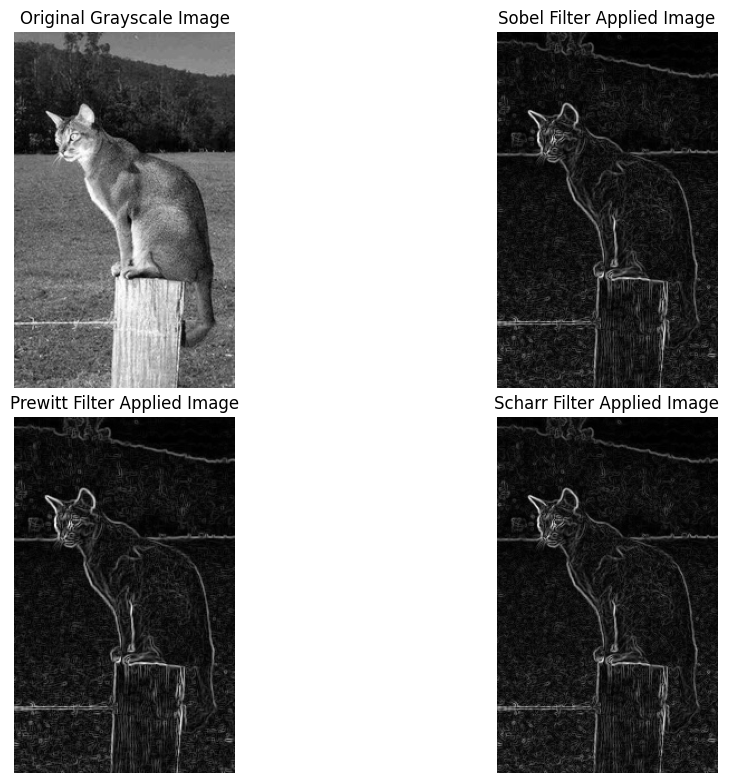

In [19]:
applyfilters(image1)

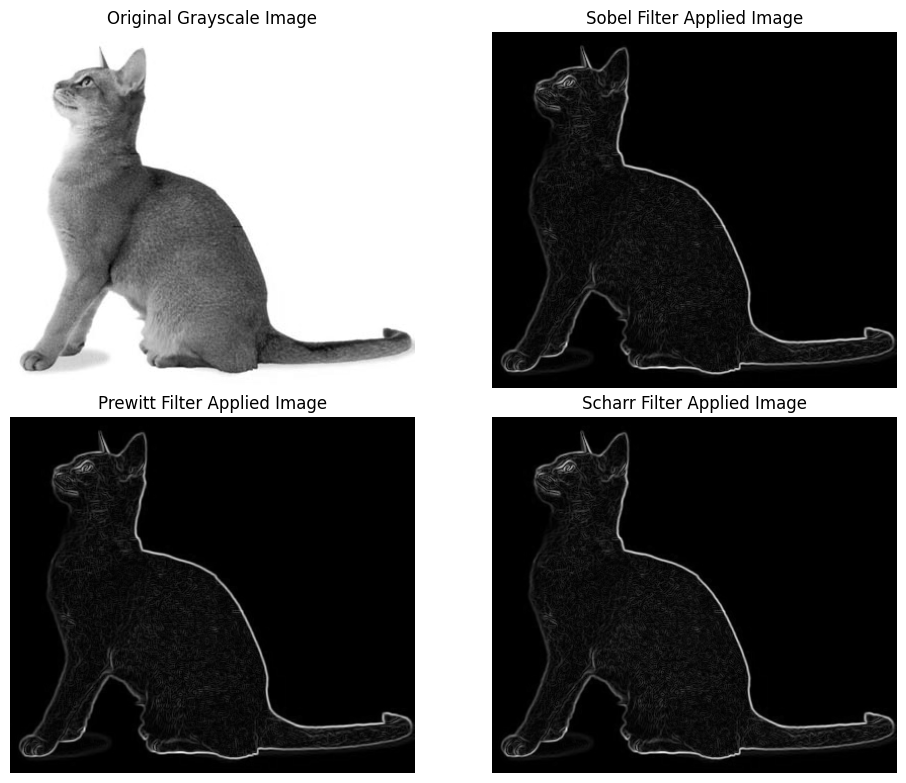

In [20]:
applyfilters(image2)

### Segmentation using Threshold Technique

In [21]:

def threshold_dectection(image):
  gray_image = skimage.color.rgb2gray(image)
  thresh = threshold_otsu(gray_image)
  binary = gray_image > thresh
  fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
  ax = axes.ravel()
  ax[0] = plt.subplot(1, 3, 1)
  ax[1] = plt.subplot(1, 3, 2)
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

  ax[0].imshow(gray_image, cmap=plt.cm.gray)
  ax[0].set_title('Original')
  ax[0].axis('off')

  ax[1].hist(image.ravel(), bins=256)
  ax[1].set_title('Histogram')
  ax[1].axvline(thresh, color='r')

  ax[2].imshow(binary, cmap=plt.cm.gray)
  ax[2].set_title('Thresholded')
  ax[2].axis('off')

  plt.show()

<ipython-input-21-aae144e034c5>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


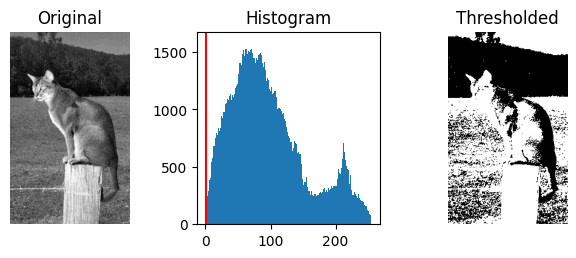

In [22]:
threshold_dectection(image1)

<ipython-input-21-aae144e034c5>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


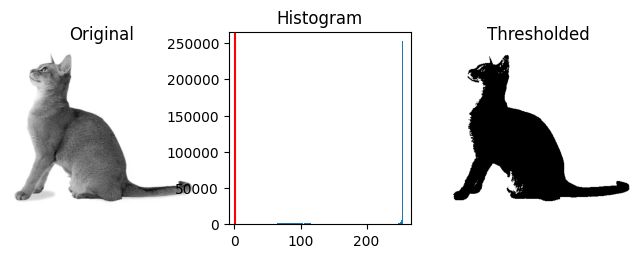

In [23]:
threshold_dectection(image2)